<a href="https://colab.research.google.com/github/plaban1981/CatBoost_Tutorials/blob/master/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is a sample notebook for illustration purposes only. We recommend including the below cell with important candidate instructions.
You may need to update the OS and package versions based on the current environment.

### Environment
Ubuntu 22.04 LTS which includes **Python 3.9.12** and utilities *curl*, *git*, *vim*, *unzip*, *wget*, and *zip*. There is no *GPU* support.

The IPython Kernel allows you to execute Python code in the Notebook cell and Python console.

### Installing packages
- Run `!mamba list "package_name"` command to check the package installation status. For example,

```python
!mamba list numpy
"""
# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
numpy                     1.21.6           py39h18676bf_0    conda-forge
"""
```

    You can also try importing the package.

- Run the `!mamba install "package_name"` to install a package

### Excluding large files
HackerRank rejects any submission larger than **20MB**. Therefore, you must exclude any large files by adding these to the *.gitignore* file.
You can **Submit** code to validate the status of your submission.

## Introduction

The Occupational Employment and Wage Statistics (OEWS) program produces employment and wage estimates annually for nearly 800 occupations. These estimates are available for the nation as a whole, for individual states, and for metropolitan and nonmetropolitan areas; national occupational estimates for specific industries are also available.

## Problem

The data used in this problem is a subset of the OEWS data, which include the 10-th percentile, 25-th percentile, 50-th percentile (a.k.a median), 75-th percentile, and 90-th percentile of the annual salary of a given combination of states, industries, and occupations.

One needs to use the data in _train.csv_ to train a machine learning model to predict the 10-th, 25-th, 50-th, 75-th and 90-th percentiles of the given combinations in _submission.csv_.

## Data

### Independent Variables

There are three independent variable columns:
- PRIM_STATE
- NAICS_TITLE
- OCC_TITLE

indicating the state, industry, and occupation.

NOTE:
- In the _PRIM_STATE_ variable, each category indicates a state postal abbreviation (like "_CA_", "_TX_", etc.) or "_U.S_" as the whole United States. When _PRIM_STATE_ is "_U.S_", it means the percentiles are aggregated across all the states.
- In thes _NAICS_TITLE_, each category indicates an industry sector name (like "_Retail Trade_", "_Manufacturing_") or "_Cross-industry_". When _NAICS_TITLE_ is "_Cross-industry_", it means the percentiles are aggregated across all the industries.

### Target Variables

There are 5 dependent (target) variable columns:
- A_PCT10
- A_PCT25
- A_MEDIAN
- A_PCT75
- A_PCT90

indicating the 10-th percentile, 25-th percentile, median, 75-th percentile, 90-th percentile of the annual base salary given the state, industry, and occupation information.

**IMPORTANT**: the percentiles should follow an increasing order. Namely, the 10-th percentile is less than (<) the 25-th percentile, the 25-th percentile is less than (<) the 50-th percentile, etc.

## Deliverables

### Submit a Well commented Jupyter Notebook

Explore the data, make visualizations, and generate new features if required. Make appropriate plots, annotate the notebook with markdowns and explain necessary inferences. A person should be able to read the notebook and understand the steps taken as well as the reasoning behind them. The solution will be graded on the basis of the usage of effective visualizations to convey the analysis and the modeling process.


### Submit _submission.csv_

In the given _submission.csv_, values in the "A_PCT10", "A_PCT25", "A_MEDIAN", "A_PCT75", and "A_PCT90" columns are constants, and you need to replace them with your model predictions.

**IMPORTANT**:
- please do not change the header given in _submission.csv_, or your predictions may not be evaluated correctly.
- Your Jupyter Notebook should be able to generate your submitted predictions.



## Evaluation Metric

The model performance is evaluated by the mean normalized weighted absolute error (MNWAE) defined as the following:
$$ MNWAE = \frac{1}{n} \sum_{i=1}^{n} \sum_{j \in \{10, 25, 50, 75, 90\}} w_j \times \frac{|y_{i,j}-z_{i,j}|}{z_{i,j}}$$
where $y_{i,j}$ and $z_{i,j}$ are the model estimation and the ground truth of the $i$-th row and $j$-th percentile, and
$$ w_{10} = w_{90} = 0.1, $$
$$ w_{25} = w_{75} = 0.2, $$
$$ w_{50} = 0.4 $$

For example, if

actual percentiles = [10000, 30000, 60000, 80000, 100000],

predicted percentiles = [11000, 33000, 54000, 88000, 120000],

normalized weighted absolute error = 0.1*|11000-10000|/10000+0.2*|33000-30000|/30000+0.4*|54000-60000|/60000+0.2*|88000-80000|/80000+0.1*|120000-100000|/100000 = 0.11

**IMPORTANT**: if the predicted percentiles in any row do not follow an increasing order, all the predictions will be considered as invalid.

## Solution ..

In [1]:
actual percentiles = [10000, 30000, 60000, 80000, 100000]

predicted percentiles = [11000, 33000, 54000, 88000, 120000]


SyntaxError: ignored

In [3]:
# decision tree for multioutput regression
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
# create datasets
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=5, random_state=1, noise=0.5)
print(y)
# define model
model = DecisionTreeRegressor()
# fit model
model.fit(X, y)
# make a prediction
row = [0.21947749, 0.32948997, 0.81560036, 0.440956, -0.0606303, -0.29257894, -0.2820059, -0.00290545, 0.96402263, 0.04992249]
yhat = model.predict([row])
# summarize prediction
print(yhat[0])

[[  67.87444826  -19.13905087  144.37391191   86.54540615 -100.40079239]
 [  12.65297671   -6.65317605 -101.65881982 -127.38197293  -81.30439034]
 [ 197.97568988  128.57589601   16.41278546    9.29579458  109.58995046]
 ...
 [-109.0523586   -13.109607   -142.05856257  -91.19832675  -91.33550665]
 [ -53.67523682  -79.23744634  -85.72681555  -71.14541997 -161.11901129]
 [-145.52392122 -101.84908684  -58.06471652  -45.1111553  -143.48517703]]
[255.43681406  63.69007828 185.95395746  80.64005887  83.42095667]


In [76]:

# example of evaluating direct multioutput regression with an SVM model
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=5, random_state=1, noise=0.5)
# define base model
model = {'linear_svm': LinearSVR(),
         'Decision_tree':DecisionTreeRegressor(),
         'Linear_Regression':LinearRegression(),
         'Catboost':CatBoostRegressor()}
#model = LinearSVR()
#model = DecisionTreeRegressor()
# define the direct multioutput wrapper model
for k,v in model.items():
  wrapper = MultiOutputRegressor(v)
  # define the evaluation procedure
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate the model and collect the scores
  n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # force the scores to be positive
  n_scores = absolute(n_scores)
  # summarize performance
  print('%s MAE: %.3f std: (%.3f)' % ( v,mean(n_scores), std(n_scores)))
  # make predictions
  wrapper.fit(X,y)
  row = [0.21947749, 0.32948997, 0.81560036, 0.440956, -0.0606303, -0.29257894, -0.2820059, -0.00290545, 0.96402263, 0.04992249]
  yhat = wrapper.predict([row])
  print(f"{v} : predictions :{yhat}")

Streaming output truncated to the last 5000 lines.
5:	learn: 132.7700752	total: 65.8ms	remaining: 10.9s
6:	learn: 129.8717485	total: 69ms	remaining: 9.79s
7:	learn: 127.0391687	total: 73.6ms	remaining: 9.12s
8:	learn: 123.7961223	total: 76.4ms	remaining: 8.41s
9:	learn: 120.8702226	total: 79.2ms	remaining: 7.84s
10:	learn: 118.0674660	total: 82.1ms	remaining: 7.39s
11:	learn: 115.2340329	total: 85ms	remaining: 7s
12:	learn: 112.6430269	total: 87.9ms	remaining: 6.67s
13:	learn: 110.3863206	total: 90.6ms	remaining: 6.38s
14:	learn: 107.9229644	total: 93.4ms	remaining: 6.14s
15:	learn: 105.4402184	total: 96.3ms	remaining: 5.92s
16:	learn: 103.2642207	total: 99ms	remaining: 5.72s
17:	learn: 101.1694902	total: 102ms	remaining: 5.55s
18:	learn: 99.0574880	total: 105ms	remaining: 5.4s
19:	learn: 96.8869209	total: 108ms	remaining: 5.27s
20:	learn: 95.2495367	total: 111ms	remaining: 5.17s
21:	learn: 93.4855779	total: 114ms	remaining: 5.08s
22:	learn: 91.8050094	total: 118ms	remaining: 5s
23:	le

## Introduction

The Occupational Employment and Wage Statistics (OEWS) program produces employment and wage estimates annually for nearly 800 occupations. These estimates are available for the nation as a whole, for individual states, and for metropolitan and nonmetropolitan areas; national occupational estimates for specific industries are also available.

## Problem

The data used in this problem is a subset of the OEWS data, which include the 10-th percentile, 25-th percentile, 50-th percentile (a.k.a median), 75-th percentile, and 90-th percentile of the annual salary of a given combination of states, industries, and occupations.

One needs to use the data in _train.csv_ to train a machine learning model to predict the 10-th, 25-th, 50-th, 75-th and 90-th percentiles of the given combinations in _submission.csv_.

## Data

### Independent Variables

There are three independent variable columns:
- PRIM_STATE
- NAICS_TITLE
- OCC_TITLE

indicating the state, industry, and occupation.

NOTE:
- In the _PRIM_STATE_ variable, each category indicates a state postal abbreviation (like "_CA_", "_TX_", etc.) or "_U.S_" as the whole United States. When _PRIM_STATE_ is "_U.S_", it means the percentiles are aggregated across all the states.
- In thes _NAICS_TITLE_, each category indicates an industry sector name (like "_Retail Trade_", "_Manufacturing_") or "_Cross-industry_". When _NAICS_TITLE_ is "_Cross-industry_", it means the percentiles are aggregated across all the industries.

### Target Variables

There are 5 dependent (target) variable columns:
- A_PCT10
- A_PCT25
- A_MEDIAN
- A_PCT75
- A_PCT90

indicating the 10-th percentile, 25-th percentile, median, 75-th percentile, 90-th percentile of the annual base salary given the state, industry, and occupation information.

**IMPORTANT**: the percentiles should follow an increasing order. Namely, the 10-th percentile is less than (<) the 25-th percentile, the 25-th percentile is less than (<) the 50-th percentile, etc.

## Deliverables

### Submit a Well commented Jupyter Notebook

Explore the data, make visualizations, and generate new features if required. Make appropriate plots, annotate the notebook with markdowns and explain necessary inferences. A person should be able to read the notebook and understand the steps taken as well as the reasoning behind them. The solution will be graded on the basis of the usage of effective visualizations to convey the analysis and the modeling process.


### Submit _submission.csv_

In the given _submission.csv_, values in the "A_PCT10", "A_PCT25", "A_MEDIAN", "A_PCT75", and "A_PCT90" columns are constants, and you need to replace them with your model predictions.

**IMPORTANT**:
- please do not change the header given in _submission.csv_, or your predictions may not be evaluated correctly.
- Your Jupyter Notebook should be able to generate your submitted predictions.



## Evaluation Metric

The model performance is evaluated by the mean normalized weighted absolute error (MNWAE) defined as the following:
$$ MNWAE = \frac{1}{n} \sum_{i=1}^{n} \sum_{j \in \{10, 25, 50, 75, 90\}} w_j \times \frac{|y_{i,j}-z_{i,j}|}{z_{i,j}}$$
where $y_{i,j}$ and $z_{i,j}$ are the model estimation and the ground truth of the $i$-th row and $j$-th percentile, and
$$ w_{10} = w_{90} = 0.1, $$
$$ w_{25} = w_{75} = 0.2, $$
$$ w_{50} = 0.4 $$

For example, if

actual percentiles = [10000, 30000, 60000, 80000, 100000],

predicted percentiles = [11000, 33000, 54000, 88000, 120000],

normalized weighted absolute error = 0.1*|11000-10000|/10000+0.2*|33000-30000|/30000+0.4*|54000-60000|/60000+0.2*|88000-80000|/80000+0.1*|120000-100000|/100000 = 0.11

**IMPORTANT**: if the predicted percentiles in any row do not follow an increasing order, all the predictions will be considered as invalid.

In [142]:
actual = [10000, 30000, 60000, 80000, 100000]
predicted = [11000, 33000, 54000, 88000, 120000]

In [161]:
np.array(actual)

array([ 10000,  30000,  60000,  80000, 100000])

In [160]:
0.2 * (8000/800000)

0.002

In [167]:
MNWAE(actual,predicted)

0.11000000000000001

## Import Required Libraries

In [75]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [21]:
# Import the `pandas` library to load the dataset
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the dataset

In [22]:
df_train = pd.read_csv('train.csv')

In [23]:
df_train.head()

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,US,"Arts, Entertainment, and Recreation",Supervisors of Transportation and Material Mov...,32350.0,40200.0,50790.0,62560.0,78520.0
1,US,"Mining, Quarrying, and Oil and Gas Extraction","Sales Representatives, Wholesale and Manufactu...",47860.0,61600.0,87810.0,107460.0,153600.0
2,US,Finance and Insurance,Physical Scientists,59240.0,63050.0,89740.0,126320.0,149070.0
3,US,Administrative and Support and Waste Managemen...,"Architects, Surveyors, and Cartographers",37320.0,47630.0,60550.0,77450.0,98990.0
4,US,Manufacturing,Supervisors of Protective Service Workers,50130.0,63840.0,81770.0,104530.0,133180.0


## Diiferent occupation assciate with domain Arts, Entertainment, and Recreation	

In [53]:
df_train[(df_train['PRIM_STATE'] =='US') &(df_train['NAICS_TITLE'] =='Arts, Entertainment, and Recreation')]

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,US,"Arts, Entertainment, and Recreation",Supervisors of Transportation and Material Mov...,32350.0,40200.0,50790.0,62560.0,78520.0
34,US,"Arts, Entertainment, and Recreation",Communications Equipment Operators,22580.0,24830.0,28990.0,29990.0,36980.0
47,US,"Arts, Entertainment, and Recreation",Other Management Occupations,37280.0,47840.0,61900.0,93920.0,128190.0
85,US,"Arts, Entertainment, and Recreation","Librarians, Curators, and Archivists",29570.0,37540.0,48320.0,62710.0,80810.0
106,US,"Arts, Entertainment, and Recreation",Grounds Maintenance Workers,22440.0,24300.0,29620.0,35300.0,38750.0
...,...,...,...,...,...,...,...,...
2056,US,"Arts, Entertainment, and Recreation",Animal Care and Service Workers,20080.0,26960.0,30060.0,38270.0,48530.0
2097,US,"Arts, Entertainment, and Recreation","Forest, Conservation, and Logging Workers",23260.0,27320.0,32330.0,38020.0,47460.0
2099,US,"Arts, Entertainment, and Recreation",Building Cleaning and Pest Control Workers,21150.0,23580.0,29110.0,30790.0,37790.0
2246,US,"Arts, Entertainment, and Recreation",Legal Occupations,63470.0,95050.0,125460.0,NaN,NaN


## Previewing the data for state CA

In [57]:
df_train[(df_train['PRIM_STATE'] =='CA')]

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
175,CA,Cross-industry,Protective Service Occupations,30540.0,35990.0,49090.0,94150.0,124840.0
435,CA,Cross-industry,Transportation and Material Moving Occupations,29850.0,30730.0,37810.0,47910.0,61870.0
519,CA,Cross-industry,Business and Financial Operations Occupations,47040.0,60970.0,79330.0,103670.0,150110.0
563,CA,Cross-industry,Educational Instruction and Library Occupations,30850.0,38630.0,62150.0,99160.0,127920.0
599,CA,Cross-industry,"Life, Physical, and Social Science Occupations",39070.0,55610.0,79930.0,118510.0,148990.0
609,CA,Cross-industry,Food Preparation and Serving Related Occupations,29280.0,29970.0,30910.0,36970.0,45430.0
726,CA,Cross-industry,Healthcare Support Occupations,29620.0,29670.0,29880.0,37190.0,48000.0
988,CA,Cross-industry,"Farming, Fishing, and Forestry Occupations",29120.0,29400.0,29740.0,33510.0,43590.0
1335,CA,Cross-industry,Architecture and Engineering Occupations,59110.0,76920.0,99830.0,130510.0,166610.0
1657,CA,Cross-industry,Computer and Mathematical Occupations,58340.0,79050.0,120710.0,162000.0,197870.0


## Previewing the data for state FL

In [58]:
df_train[(df_train['PRIM_STATE'] =='FL')]

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
110,FL,Cross-industry,"Life, Physical, and Social Science Occupations",32510.0,41600.0,59240.0,79510.0,105250.0
220,FL,Cross-industry,Building and Grounds Cleaning and Maintenance ...,22150.0,23470.0,28910.0,33890.0,38690.0
371,FL,Cross-industry,Healthcare Support Occupations,22810.0,27240.0,29620.0,37170.0,46720.0
465,FL,Cross-industry,Food Preparation and Serving Related Occupations,19040.0,21470.0,24960.0,30190.0,39220.0
877,FL,Cross-industry,Transportation and Material Moving Occupations,22690.0,27820.0,31150.0,42970.0,60110.0
994,FL,Cross-industry,Personal Care and Service Occupations,19930.0,22840.0,28120.0,35840.0,47750.0
1053,FL,Cross-industry,Educational Instruction and Library Occupations,24040.0,36470.0,48920.0,75190.0,80660.0
1140,FL,Cross-industry,Construction and Extraction Occupations,29150.0,35630.0,39870.0,48910.0,63010.0
1141,FL,Cross-industry,Computer and Mathematical Occupations,38300.0,57720.0,78370.0,102600.0,131180.0
1142,FL,Cross-industry,Architecture and Engineering Occupations,38260.0,58350.0,77250.0,101000.0,129310.0


## Training data Summary Statistics

In [25]:
df_train.shape

(2297, 8)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PRIM_STATE   2297 non-null   object 
 1   NAICS_TITLE  2297 non-null   object 
 2   OCC_TITLE    2297 non-null   object 
 3   A_PCT10      2297 non-null   float64
 4   A_PCT25      2297 non-null   float64
 5   A_MEDIAN     2297 non-null   float64
 6   A_PCT75      2267 non-null   float64
 7   A_PCT90      2158 non-null   float64
dtypes: float64(5), object(3)
memory usage: 143.7+ KB


## Display first 5 rows of the dataset

In [51]:
df_train.head()

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,US,"Arts, Entertainment, and Recreation",Supervisors of Transportation and Material Mov...,32350.0,40200.0,50790.0,62560.0,78520.0
1,US,"Mining, Quarrying, and Oil and Gas Extraction","Sales Representatives, Wholesale and Manufactu...",47860.0,61600.0,87810.0,107460.0,153600.0
2,US,Finance and Insurance,Physical Scientists,59240.0,63050.0,89740.0,126320.0,149070.0
3,US,Administrative and Support and Waste Managemen...,"Architects, Surveyors, and Cartographers",37320.0,47630.0,60550.0,77450.0,98990.0
4,US,Manufacturing,Supervisors of Protective Service Workers,50130.0,63840.0,81770.0,104530.0,133180.0


## Check for missing values

In [27]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

A_PCT75     30
A_PCT90    139
dtype: int64

* the target variable has mising values 

In [46]:
null_df = df_train[(df_train['A_PCT75'].isnull())|(df_train['A_PCT90'].isnull())]

In [47]:
null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 2158 to 2296
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PRIM_STATE   139 non-null    object 
 1   NAICS_TITLE  139 non-null    object 
 2   OCC_TITLE    139 non-null    object 
 3   A_PCT10      139 non-null    float64
 4   A_PCT25      139 non-null    float64
 5   A_MEDIAN     139 non-null    float64
 6   A_PCT75      109 non-null    float64
 7   A_PCT90      0 non-null      float64
dtypes: float64(5), object(3)
memory usage: 9.8+ KB


In [48]:
null_df.head()

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
2158,US,Cross-industry,Management Occupations,47860.0,74710.0,102450.0,160960.0,NaN
2159,US,Cross-industry,Top Executives,41260.0,60900.0,98720.0,160540.0,NaN
2160,US,Cross-industry,"Advertising, Marketing, Promotions, Public Rel...",63270.0,95140.0,128160.0,177360.0,NaN
2161,US,Cross-industry,Operations Specialties Managers,73230.0,95660.0,127140.0,165860.0,NaN
2162,US,Cross-industry,Legal Occupations,38620.0,58400.0,82430.0,156900.0,NaN


In [49]:
for col in null_df.columns:
  if null_df[col].dtypes == 'object':
    print(f"{col} : {null_df[col].unique()} :{null_df[col].nunique()}")
    print("\n")

PRIM_STATE : ['US' 'CA' 'CO' 'CT' 'DE' 'DC' 'GA' 'IL' 'MD' 'MA' 'NH' 'NJ' 'NY' 'NC'
 'PA' 'RI' 'TX' 'VA' 'WA' 'FL'] :20


NAICS_TITLE : ['Cross-industry' 'Agriculture, Forestry, Fishing and Hunting'
 'Mining, Quarrying, and Oil and Gas Extraction' 'Utilities'
 'Construction' 'Wholesale Trade' 'Information' 'Finance and Insurance'
 'Real Estate and Rental and Leasing'
 'Professional, Scientific, and Technical Services'
 'Management of Companies and Enterprises'
 'Administrative and Support and Waste Management and Remediation Services'
 'Educational Services' 'Health Care and Social Assistance'
 'Arts, Entertainment, and Recreation' 'Accommodation and Food Services'
 'Other Services (except Public Administration)'
 'Federal, State, and Local Government, excluding state and local schools and hospitals and the U.S. Postal Service (OES Designation)'
 'Manufacturing' 'Retail Trade' 'Transportation and Warehousing'] :21


OCC_TITLE : ['Management Occupations' 'Top Executives'
 'Advertising, 

## Categorical Values summary

In [50]:
for col in null_df.columns:
  if df_train[col].dtypes == 'object':
    print(f"{col} : {df_train[col].unique()} :{df_train[col].nunique()}")
    print("\n")

PRIM_STATE : ['US' 'RI' 'NJ' 'NH' 'DE' 'WA' 'MI' 'ID' 'VA' 'NY' 'AR' 'AZ' 'TX' 'IL'
 'MO' 'OH' 'UT' 'OK' 'WV' 'PA' 'IN' 'HI' 'KY' 'LA' 'MS' 'MN' 'NC' 'TN'
 'ME' 'FL' 'NM' 'KS' 'CO' 'DC' 'MD' 'VT' 'MA' 'OR' 'CA' 'IA' 'AL' 'WI'
 'CT' 'NV' 'SC' 'GA' 'AK' 'WY' 'NE' 'SD' 'MT' 'ND'] :52


NAICS_TITLE : ['Arts, Entertainment, and Recreation'
 'Mining, Quarrying, and Oil and Gas Extraction' 'Finance and Insurance'
 'Administrative and Support and Waste Management and Remediation Services'
 'Manufacturing' 'Other Services (except Public Administration)'
 'Health Care and Social Assistance' 'Cross-industry' 'Retail Trade'
 'Professional, Scientific, and Technical Services' 'Information'
 'Real Estate and Rental and Leasing' 'Wholesale Trade'
 'Management of Companies and Enterprises'
 'Federal, State, and Local Government, excluding state and local schools and hospitals and the U.S. Postal Service (OES Designation)'
 'Educational Services' 'Utilities'
 'Agriculture, Forestry, Fishing and Hunting

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

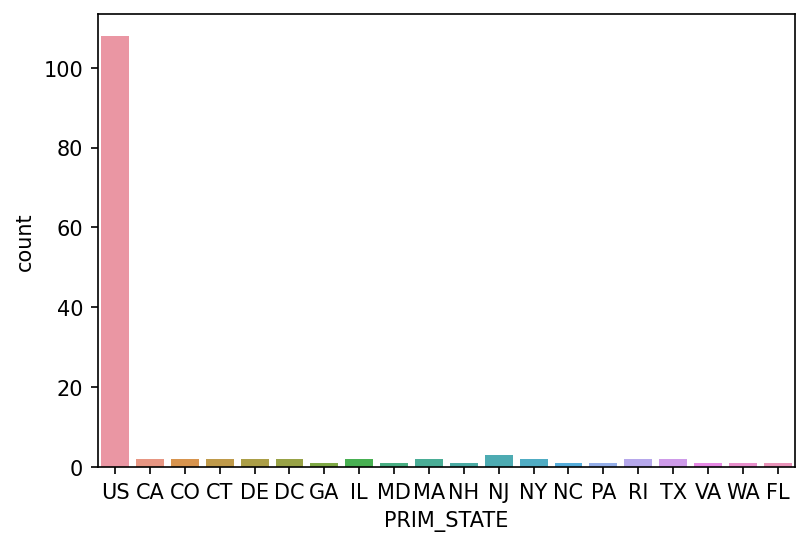

In [44]:
plt.figure(dpi=150)
sns.countplot(x='PRIM_STATE',data=null_df)
plt

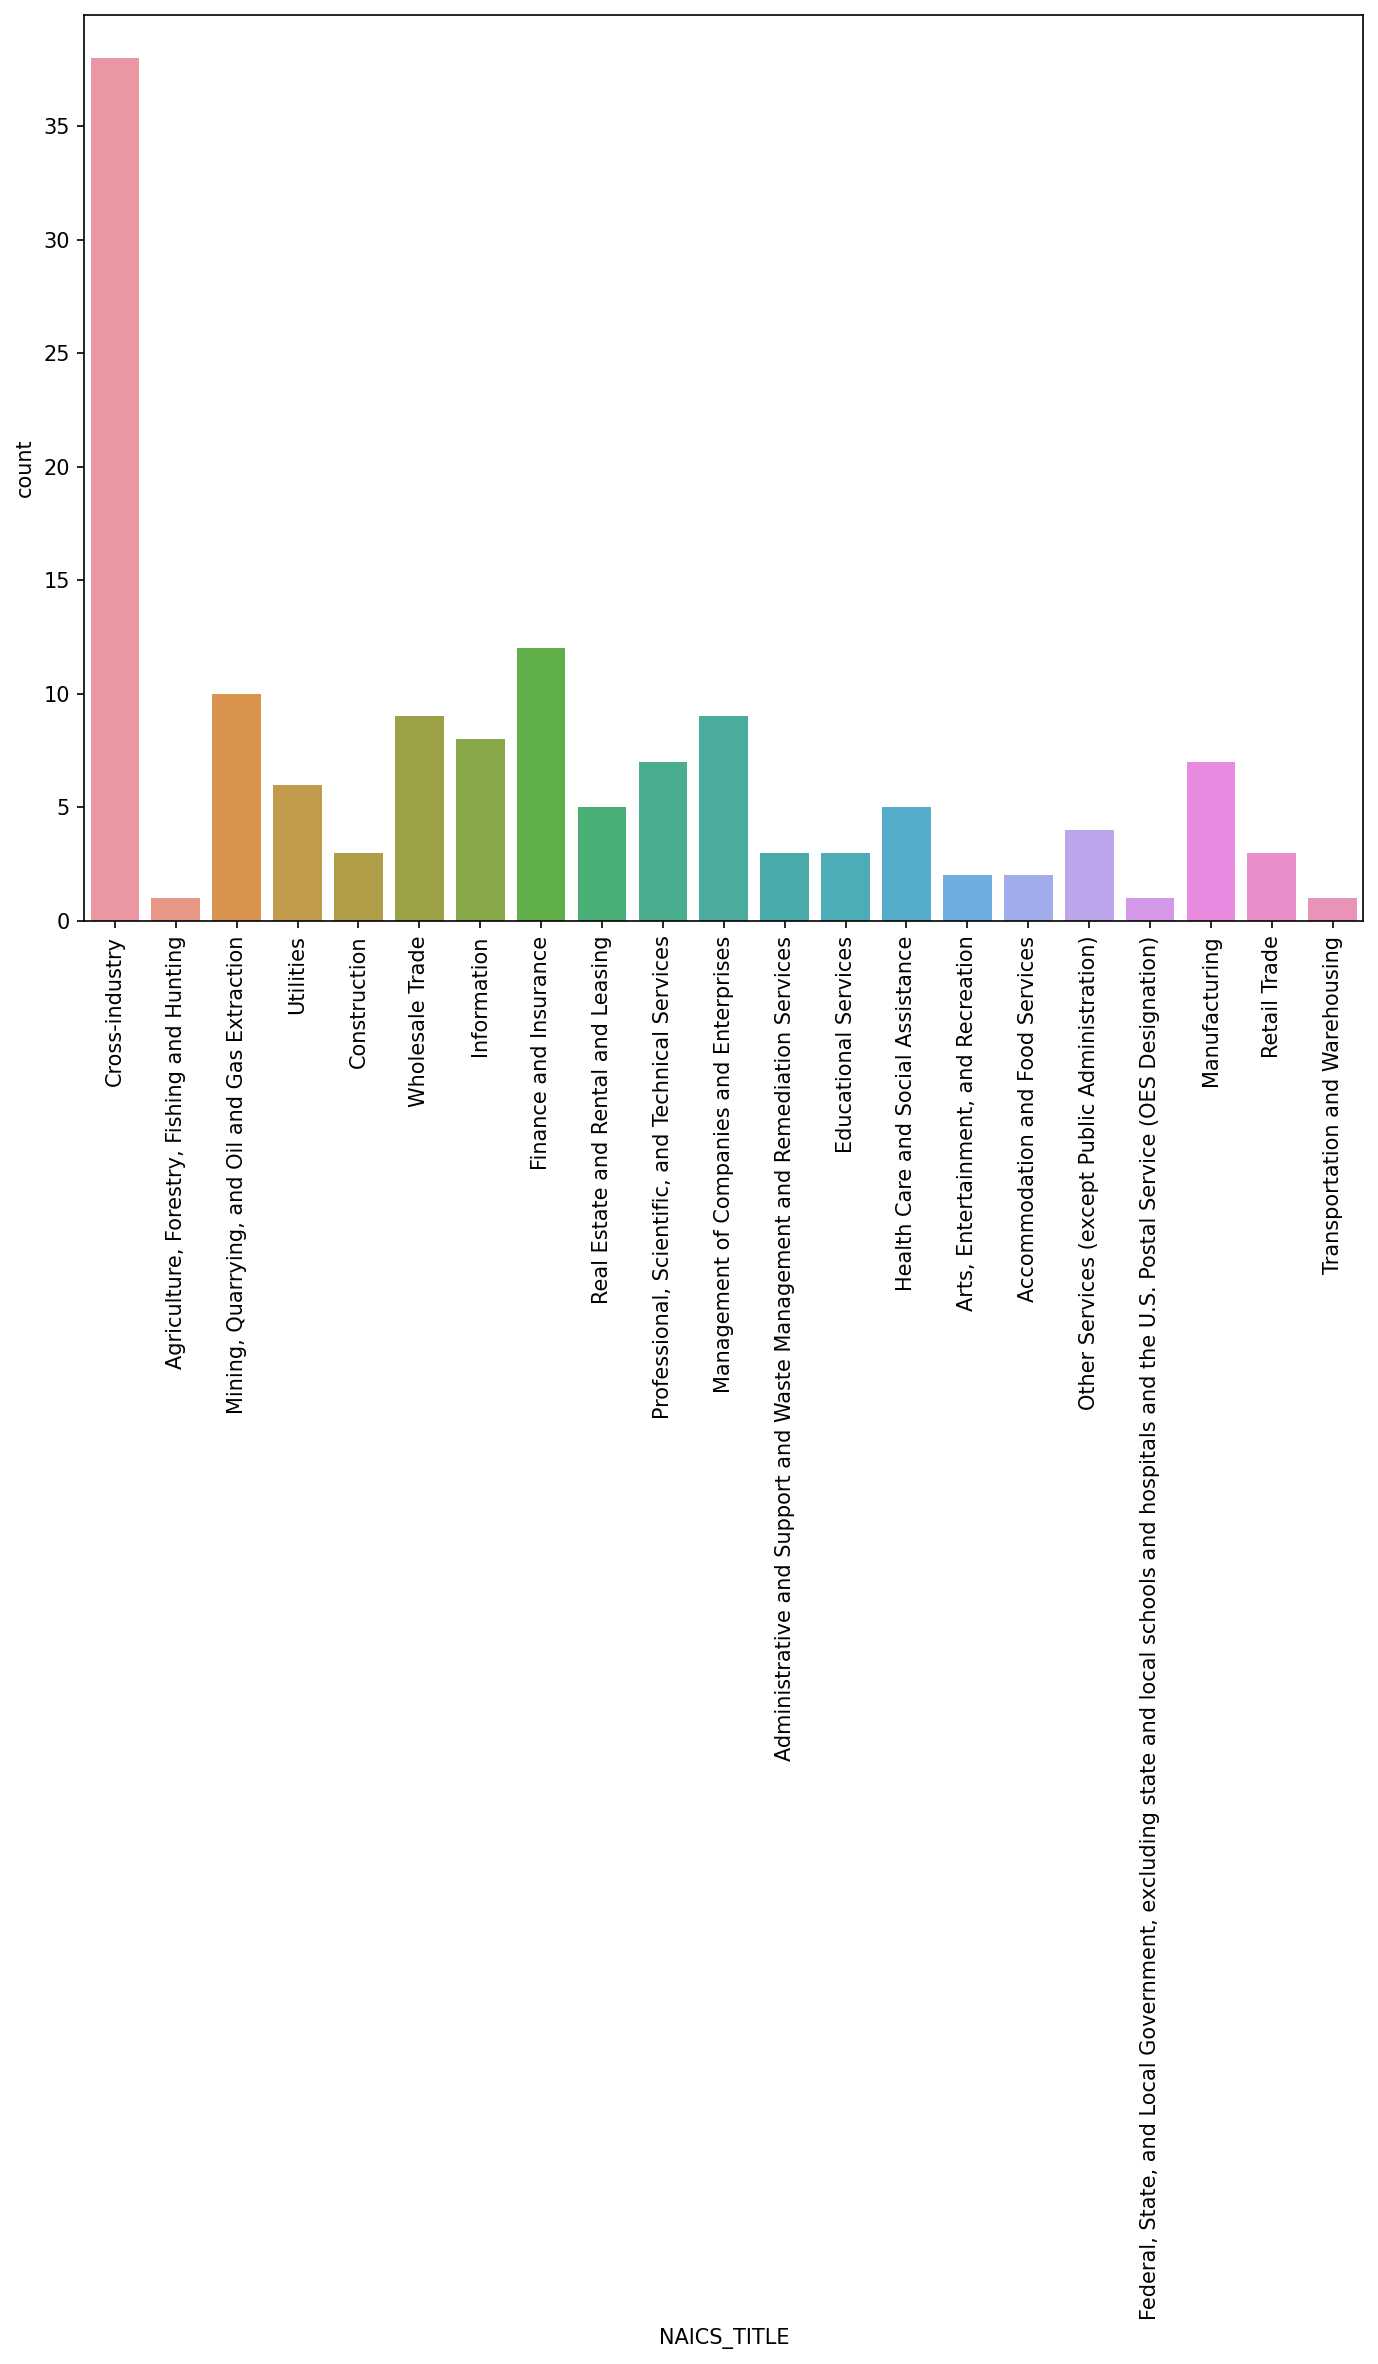

In [63]:
plt.figure(figsize=(11,8),dpi=150)
sns.countplot(x='NAICS_TITLE',data=null_df)
plt.xticks(rotation=90)
plt.show()

## removing labels having null data and store into another dataframe

In [72]:
train = df_train[~df_train.index.isin(null_df.index)]

In [74]:
train.shape,df_train.shape

((2158, 8), (2297, 8))

## Split the dataset into training and validation set

In [78]:
from sklearn.model_selection import train_test_split
traindf,valdf = train_test_split(train,stratify=train['PRIM_STATE'],test_size=0.2,random_state=42)

In [79]:
print(traindf.shape)
print(valdf.shape)

(1726, 8)
(432, 8)


## Separate Features and Label

In [112]:
X_train = traindf[['PRIM_STATE','NAICS_TITLE','OCC_TITLE']]
y_train = traindf[['A_PCT10','A_PCT25','A_MEDIAN','A_PCT75','A_PCT90']]

In [113]:
X_val = valdf[['PRIM_STATE','NAICS_TITLE','OCC_TITLE']]
y_val = valdf[['A_PCT10','A_PCT25','A_MEDIAN','A_PCT75','A_PCT90']]

##Label Encoding

In [88]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [114]:
prim_state_train = lb.fit_transform(X_train['PRIM_STATE'])
prim_state_val = lb.transform(X_val['PRIM_STATE']) 
map_prim = {v:k for k,v in enumerate(lb.classes_.tolist())}

In [115]:
naics_train = lb.fit_transform(X_train['NAICS_TITLE'])
naics_val = lb.transform(X_val['NAICS_TITLE']) 
map_naics = {v:k for k,v in enumerate(lb.classes_.tolist())}

In [116]:
occ_train = lb.fit_transform(X_train['OCC_TITLE'])
occ_val = lb.transform(X_val['OCC_TITLE']) 
map_occ = {v:k for k,v in enumerate(lb.classes_.tolist())}

In [117]:
X_train['PRIM_STATE'] = X_train['PRIM_STATE'].map(map_prim)
X_val['PRIM_STATE'] = X_val['PRIM_STATE'].map(map_prim)
#
X_train['NAICS_TITLE'] = X_train['NAICS_TITLE'].map(map_naics)
X_val['NAICS_TITLE'] = X_val['NAICS_TITLE'].map(map_naics)
#
X_train['OCC_TITLE'] = X_train['OCC_TITLE'].map(map_occ)
X_val['OCC_TITLE'] = X_val['OCC_TITLE'].map(map_occ)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [118]:
X_train.head()

,PRIM_STATE,NAICS_TITLE,OCC_TITLE
500,44,14,1
418,44,11,25
991,38,5,29
888,44,16,24
2148,44,0,30


In [119]:
X_val.head()

,PRIM_STATE,NAICS_TITLE,OCC_TITLE
878,44,12,51
2016,44,13,92
283,44,17,46
1015,43,5,89
344,44,11,35


In [133]:
X = pd.concat([X_train,X_val])
y = pd.concat([y_train,y_val])

In [134]:
X.shape,y.shape

((2158, 3), (2158, 5))

In [124]:
# define base model
#'Catboost':CatBoostRegressor()
model = {'linear_svm': LinearSVR(),
         'Decision_tree':DecisionTreeRegressor(),
         'Linear_Regression':LinearRegression()
         }
#model = LinearSVR()
#model = DecisionTreeRegressor()
# define the direct multioutput wrapper model
for k,v in model.items():
  wrapper = MultiOutputRegressor(v)
  # define the evaluation procedure
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate the model and collect the scores
  n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # force the scores to be positive
  n_scores = absolute(n_scores)
  # summarize performance
  print('%s MAE: %.3f std: (%.3f)' % ( v,mean(n_scores), std(n_scores)))


LinearSVR() MAE: 22058.685 std: (1283.365)
DecisionTreeRegressor() MAE: 10670.591 std: (437.781)
LinearRegression() MAE: 18378.977 std: (717.630)


## With Numerical features

In [190]:
model = CatBoostRegressor()
wrapper = MultiOutputRegressor(model)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('%s MAE: %.3f std: (%.3f)' % ( 'CatBoostRegressor',mean(n_scores), std(n_scores)))

CatBoostRegressor MAE: 7831.346 std: (364.730)


In [200]:
model.get_params()

{'loss_function': 'RMSE'}

## Trying with different model parameters

In [202]:
model = CatBoostRegressor(max_depth=10,iterations=1000)
wrapper = MultiOutputRegressor(model)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('%s MAE: %.3f std: (%.3f)' % ( 'CatBoostRegressor',mean(n_scores), std(n_scores)))

CatBoostRegressor MAE: 7540.102 std: (340.732)


In [229]:
model = CatBoostRegressor(max_depth=10,iterations=2000)
wrapper = MultiOutputRegressor(model)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('%s MAE: %.3f std: (%.3f)' % ( 'CatBoostRegressor',mean(n_scores), std(n_scores)))

CatBoostRegressor MAE: 7463.464 std: (340.245)


* selecting the above hyperparameters for CatboostRegressor

## Train the modelon the new parameters

In [231]:
wrapper.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
1002:	learn: 8195.8152473	total: 3.49s	remaining: 3.47s
1003:	learn: 8192.7525522	total: 3.49s	remaining: 3.46s
1004:	learn: 8189.9556198	total: 3.5s	remaining: 3.46s
1005:	learn: 8186.3673179	total: 3.5s	remaining: 3.46s
1006:	learn: 8183.2412702	total: 3.51s	remaining: 3.46s
1007:	learn: 8177.3305228	total: 3.52s	remaining: 3.46s
1008:	learn: 8173.6996566	total: 3.52s	remaining: 3.46s
1009:	learn: 8170.9382153	total: 3.52s	remaining: 3.45s
1010:	learn: 8168.2157599	total: 3.52s	remaining: 3.45s
1011:	learn: 8163.3329002	total: 3.53s	remaining: 3.44s
1012:	learn: 8160.0626843	total: 3.53s	remaining: 3.44s
1013:	learn: 8157.5561962	total: 3.54s	remaining: 3.44s
1014:	learn: 8155.7407291	total: 3.54s	remaining: 3.43s
1015:	learn: 8151.6119690	total: 3.54s	remaining: 3.43s
1016:	learn: 8149.4638007	total: 3.54s	remaining: 3.43s
1017:	learn: 8146.8105031	total: 3.55s	remaining: 3.42s
1018:	learn: 8142.5703814	total: 3.55s	remaining: 3.42s

MultiOutputRegressor(estimator=<catboost.core.CatBoostRegressor object at 0x7f2aaee2d050>)

## Make Predictions

In [232]:
y_pred = wrapper.predict(X_val)

In [233]:
y_pred.shape

(432, 5)

In [234]:
predictions = pd.DataFrame(y_pred,columns=y_val.columns)

In [194]:
y_val

,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
878,23940.0,36750.0,61210.0,79400.0,101870.0
2016,22960.0,29390.0,32660.0,53920.0,60890.0
283,28220.0,30270.0,39460.0,58090.0,73920.0
1015,23120.0,30150.0,46590.0,61970.0,79310.0
344,19970.0,22730.0,29510.0,31470.0,37940.0
...,...,...,...,...,...
1169,36340.0,47120.0,76130.0,113760.0,163680.0
1222,33880.0,38800.0,51050.0,77450.0,104150.0
1915,36820.0,58670.0,77510.0,99480.0,132500.0
1598,22880.0,28650.0,36320.0,46910.0,62020.0


In [207]:
y_val.values.shape

(432, 5)

In [212]:
X_val.head()

,PRIM_STATE,NAICS_TITLE,OCC_TITLE
878,44,12,51
2016,44,13,92
283,44,17,46
1015,43,5,89
344,44,11,35


## Evaluation Metric

In [235]:
def MNWAE(actual,predicted):
  a1 = 0.1 * (np.abs(predicted[0]-actual[0])/actual[0])
  a2 = 0.2 * (np.abs(predicted[1]-actual[1])/actual[1])
  a3 = 0.4 * (np.abs(predicted[2]-actual[2])/actual[2])
  a4 = 0.2 * (np.abs(predicted[3]-actual[3])/actual[3])
  a5 = 0.1 * (np.abs(predicted[4]-actual[4])/actual[4])
  return (a1 + a2 + a3 + a4 + a5)

In [236]:
MNWAE(y_val.values,y_pred)

array([0.18810885, 0.17232909, 0.15576611, 0.08209336, 0.09082341])

##Visualize Predictions

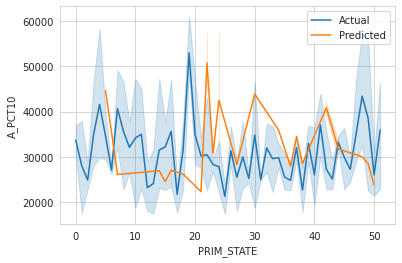

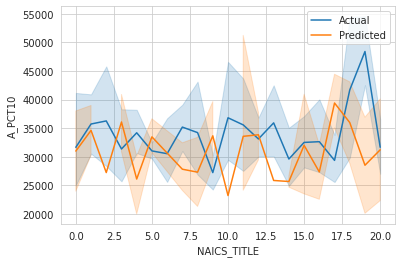

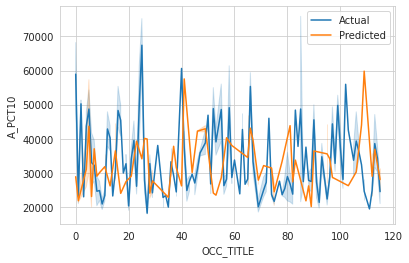

In [239]:
for col in X_val.columns:
  sns.lineplot(x =X_val[col], y =y_val['A_PCT10'],data=X_val,label="Actual")
  sns.lineplot(x =X_val[col], y =predictions['A_PCT10'],data=X_val,label="Predicted")
  plt.show()


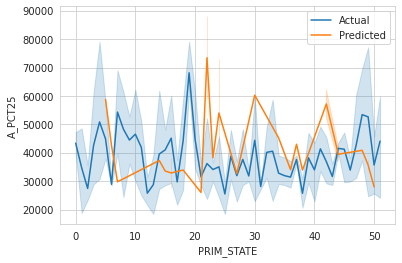

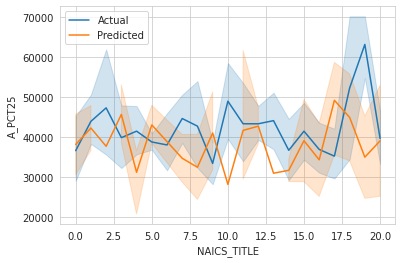

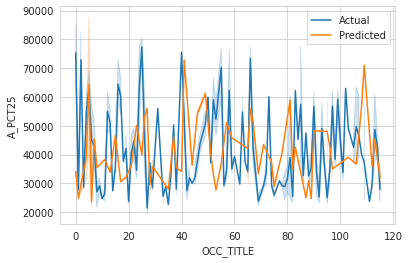

In [240]:
for col in X_val.columns:
  sns.lineplot(x =X_val[col], y =y_val['A_PCT25'],data=X_val,label="Actual")
  sns.lineplot(x =X_val[col], y =predictions['A_PCT25'],data=X_val,label="Predicted")
  plt.show()


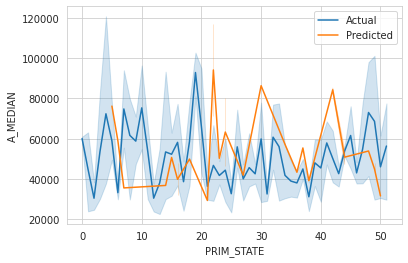

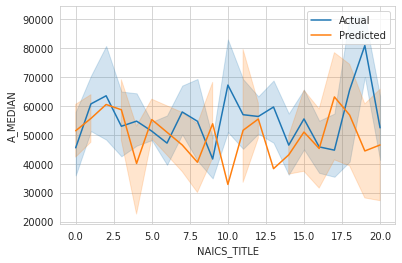

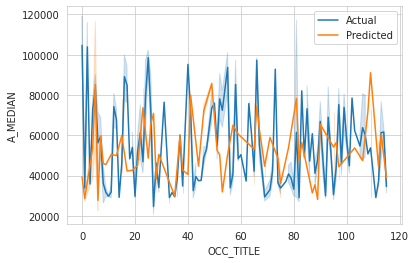

In [241]:
for col in X_val.columns:
  sns.lineplot(x =X_val[col], y =y_val['A_MEDIAN'],data=X_val,label="Actual")
  sns.lineplot(x =X_val[col], y =predictions['A_MEDIAN'],data=X_val,label="Predicted")
  plt.show()

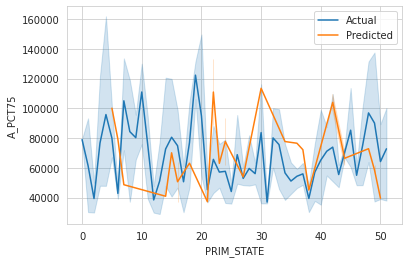

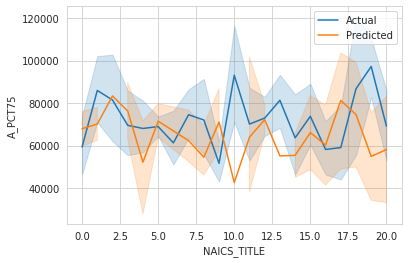

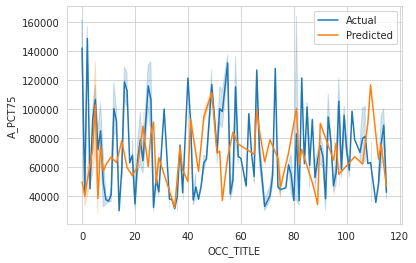

In [242]:
for col in X_val.columns:
  sns.lineplot(x =X_val[col], y =y_val['A_PCT75'],data=X_val,label="Actual")
  sns.lineplot(x =X_val[col], y =predictions['A_PCT75'],data=X_val,label="Predicted")
  plt.show()


## Train the model on the entire training sample with the new parameters

In [243]:
model = CatBoostRegressor(max_depth=10,iterations=2000)
wrapper = MultiOutputRegressor(model)
wrapper.fit(X,y)

Streaming output truncated to the last 5000 lines.
1002:	learn: 8211.4775330	total: 3.6s	remaining: 3.57s
1003:	learn: 8207.8995347	total: 3.6s	remaining: 3.57s
1004:	learn: 8206.6096523	total: 3.6s	remaining: 3.57s
1005:	learn: 8203.4060927	total: 3.61s	remaining: 3.56s
1006:	learn: 8200.0449335	total: 3.61s	remaining: 3.56s
1007:	learn: 8199.0790937	total: 3.62s	remaining: 3.56s
1008:	learn: 8195.1081668	total: 3.62s	remaining: 3.55s
1009:	learn: 8191.1612063	total: 3.62s	remaining: 3.55s
1010:	learn: 8187.8199797	total: 3.63s	remaining: 3.55s
1011:	learn: 8185.7091662	total: 3.63s	remaining: 3.54s
1012:	learn: 8182.6804652	total: 3.63s	remaining: 3.54s
1013:	learn: 8179.9689225	total: 3.64s	remaining: 3.54s
1014:	learn: 8179.2360265	total: 3.64s	remaining: 3.53s
1015:	learn: 8176.0821599	total: 3.65s	remaining: 3.53s
1016:	learn: 8170.2260100	total: 3.65s	remaining: 3.53s
1017:	learn: 8165.9064155	total: 3.65s	remaining: 3.52s
1018:	learn: 8162.8012723	total: 3.65s	remaining: 3.52s


MultiOutputRegressor(estimator=<catboost.core.CatBoostRegressor object at 0x7f2aaef7da10>)

##Submission File

In [256]:
sub = pd.read_csv("submission.csv")

In [257]:
sub.head()

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,US,Accommodation and Food Services,Other Production Occupations,10000,20000,30000,40000,50000
1,NE,Cross-industry,"Arts, Design, Entertainment, Sports, and Media...",10000,20000,30000,40000,50000
2,US,Manufacturing,Construction and Extraction Occupations,10000,20000,30000,40000,50000
3,US,Wholesale Trade,Material Moving Workers,10000,20000,30000,40000,50000
4,US,Other Services (except Public Administration),Supervisors of Building and Grounds Cleaning a...,10000,20000,30000,40000,50000


In [258]:
sub.shape

(926, 8)

In [259]:
sub.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PRIM_STATE   926 non-null    object
 1   NAICS_TITLE  926 non-null    object
 2   OCC_TITLE    926 non-null    object
 3   A_PCT10      926 non-null    int64 
 4   A_PCT25      926 non-null    int64 
 5   A_MEDIAN     926 non-null    int64 
 6   A_PCT75      926 non-null    int64 
 7   A_PCT90      926 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 58.0+ KB


In [274]:
pred = sub[['PRIM_STATE','NAICS_TITLE','OCC_TITLE']]

In [275]:
pred.head()

,PRIM_STATE,NAICS_TITLE,OCC_TITLE
0,US,Accommodation and Food Services,Other Production Occupations
1,NE,Cross-industry,"Arts, Design, Entertainment, Sports, and Media..."
2,US,Manufacturing,Construction and Extraction Occupations
3,US,Wholesale Trade,Material Moving Workers
4,US,Other Services (except Public Administration),Supervisors of Building and Grounds Cleaning a...


In [276]:
pred['PRIM_STATE'] = pred['PRIM_STATE'].map(map_prim)
pred['NAICS_TITLE'] = pred['NAICS_TITLE'].map(map_naics)
pred['OCC_TITLE'] = pred['OCC_TITLE'].map(map_occ)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [277]:
pred.head()

,PRIM_STATE,NAICS_TITLE,OCC_TITLE
0,44,0,76
1,29,5,7
2,44,12,19
3,44,20,56
4,44,14,98


In [278]:
sub_pred = wrapper.predict(pred)

In [279]:
sub_pred

array([[ 21814.10163942,  25995.89764344,  31053.06287666,
         37486.03365994,  48273.67044474],
       [ 26855.15675546,  33753.80168365,  45885.36632636,
         63032.96035853,  88115.89429406],
       [ 33815.97643816,  41569.73342117,  55654.37545336,
         70356.02871481,  90288.31421103],
       ...,
       [ 27595.49489465,  35669.37824809,  48249.36964963,
         68043.6317733 ,  96024.65071303],
       [ 44057.91072381,  59472.11556117,  86882.04056828,
        116902.79915034, 146433.40352744],
       [ 26698.51811054,  32017.20616778,  38643.46534007,
         52431.14603617,  66618.56467732]])

In [280]:
sub_predictions = pd.DataFrame(sub_pred,columns=y_val.columns)
sub_predictions.head()

,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,21814.101639,25995.897643,31053.062877,37486.033660,48273.670445
1,26855.156755,33753.801684,45885.366326,63032.960359,88115.894294
2,33815.976438,41569.733421,55654.375453,70356.028715,90288.314211
3,26258.532697,30435.430843,35293.316064,50042.825771,63585.927716
4,31498.215436,35773.112412,43980.561643,60729.931409,78133.563124


In [281]:
final = pd.concat([sub[['PRIM_STATE','NAICS_TITLE','OCC_TITLE']],sub_predictions],axis=1)

In [282]:
final.head()

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,US,Accommodation and Food Services,Other Production Occupations,21814.101639,25995.897643,31053.062877,37486.033660,48273.670445
1,NE,Cross-industry,"Arts, Design, Entertainment, Sports, and Media...",26855.156755,33753.801684,45885.366326,63032.960359,88115.894294
2,US,Manufacturing,Construction and Extraction Occupations,33815.976438,41569.733421,55654.375453,70356.028715,90288.314211
3,US,Wholesale Trade,Material Moving Workers,26258.532697,30435.430843,35293.316064,50042.825771,63585.927716
4,US,Other Services (except Public Administration),Supervisors of Building and Grounds Cleaning a...,31498.215436,35773.112412,43980.561643,60729.931409,78133.563124


In [284]:
final.to_csv('final_submission.csv',index=False)